In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [20]:
train_dir = 'TRAIN'  
test_dir = 'TEST'

In [15]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 22558 images belonging to 2 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 2413 images belonging to 2 classes.


In [23]:
print("Length of train_generator:", len(train_generator))

Length of train_generator: 705


In [24]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [25]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [28]:
history_extract = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

c:\Users\nensipansuriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
705/705 ━━━━━━━━━━━━━━━━━━━━ 541s 764ms/step - accuracy: 0.9060 - loss: 0.2330 - val_accuracy: 0.8972 - val_loss: 0.2430
Epoch 2/5
705/705 ━━━━━━━━━━━━━━━━━━━━ 223s 316ms/step - accuracy: 0.9528 - loss: 0.1219 - val_accuracy: 0.9084 - val_loss: 0.2430
Epoch 3/5
705/705 ━━━━━━━━━━━━━━━━━━━━ 225s 320ms/step - accuracy: 0.9679 - loss: 0.0874 - val_accuracy: 0.8827 - val_loss: 0.2896
Epoch 4/5
705/705 ━━━━━━━━━━━━━━━━━━━━ 224s 318ms/step - accuracy: 0.9759 - loss: 0.0640 - val_accuracy: 0.9026 - val_loss: 0.2584
Epoch 5/5
705/705 ━━━━━━━━━━━━━━━━━━━━ 240s 341ms/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9026 - val_loss: 0.2702


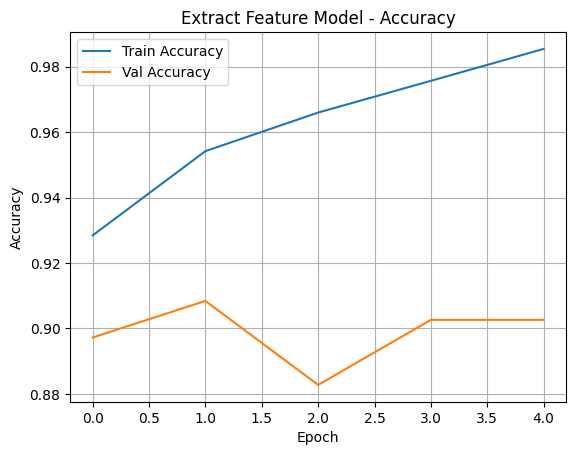

In [29]:
plt.plot(history_extract.history['accuracy'], label='Train Accuracy')
plt.plot(history_extract.history['val_accuracy'], label='Val Accuracy')
plt.title('Extract Feature Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

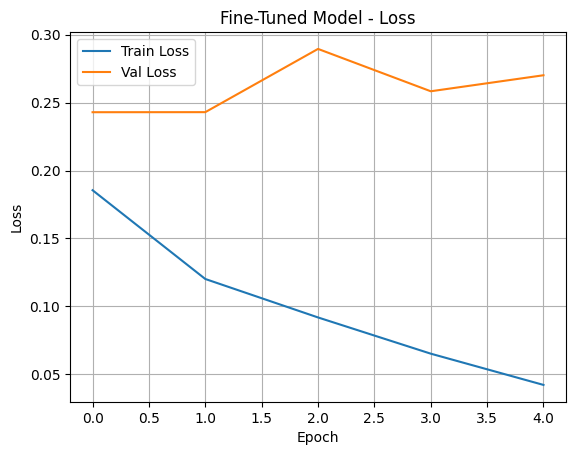

In [34]:
plt.plot(history_extract.history['loss'], label='Train Loss')
plt.plot(history_extract.history['val_loss'], label='Val Loss')
plt.title('Fine-Tuned Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

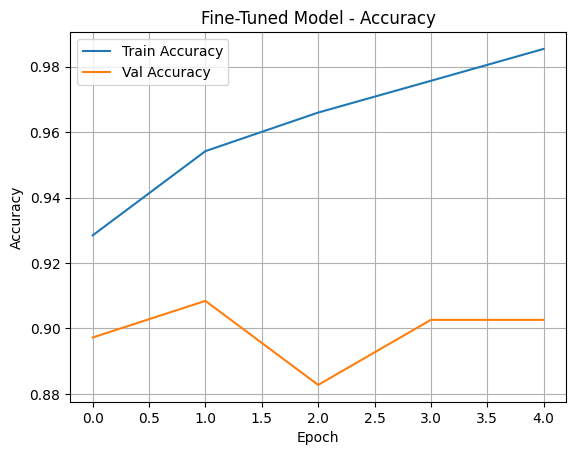

In [35]:
plt.plot(history_extract.history['accuracy'], label='Train Accuracy')
plt.plot(history_extract.history['val_accuracy'], label='Val Accuracy')
plt.title('Fine-Tuned Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [36]:
class_indices = train_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


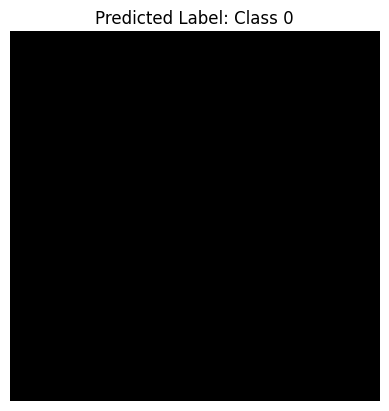

In [ ]:
x_test, y_test = next(test_generator)
index_to_plot = 1
img = x_test[index_to_plot]

plt.imshow(img.astype("uint8"))
plt.title("Predicted Label: {}".format("Class 1" if model.predict(np.expand_dims(img, axis=0)) > 0.5 else "Class 0"))
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


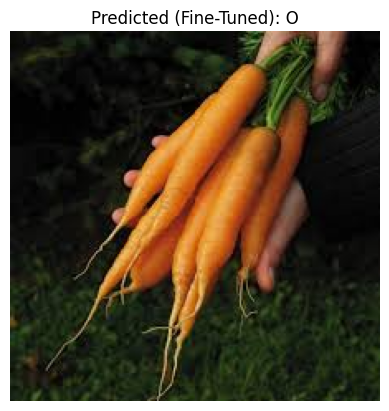

In [39]:
pred_fine = model.predict(np.expand_dims(img, axis=0))
label_fine = inv_class_indices[np.argmax(pred_fine)]

plt.imshow(img)
plt.title(f"Predicted (Fine-Tuned): {label_fine}")
plt.axis('off')
plt.show()